In [1]:
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

#### Работа с данными

In [2]:
pd.options.display.max_columns = 500

data = pd.read_csv('data/train.csv')

In [3]:
# Эти id нам не нужны, они описывают местоположение квартиры, а у нас и так есть такие колонки
data = data.drop([
    'ID_metro',
    'ID_railroad_station_walk',
    'ID_railroad_station_avto',
    'ID_big_road1',
    'ID_big_road2',
    'ID_railroad_terminal',
    'ID_bus_terminal'
], axis=1)

In [4]:
data = data.drop('id', axis=1)

print(data.shape)

data.head()

(30471, 284)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_150

In [5]:
data = data.assign(log_price_doc = np.log1p(data['price_doc']))

data = data.drop('price_doc', axis=1)

data

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_150

In [6]:
numeric_columns = data.loc[:, data.dtypes!='object'].columns

data.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,

In [7]:
# Сохраним средние значения по колонкам в файл для корректной предобработки данных на стороне сервиса
import json

mean_values = data[numeric_columns].mean(axis=0, skipna=True).to_dict()

with open('mean_values.json', 'w') as f:
    json.dump(mean_values, f)

In [8]:
# Заполним пропуски средним значением
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean())

In [9]:
# Изучим корелляции вещественных признаков
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_preschool                    0_6_all                                  1.000000
children_school                       7_14_all                                 1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

##### Значения попарных корреляций высокие, значит, в данных есть мультиколлинеарность

In [10]:
# Удалим пары признаков, значения корреляций которой превышает 0.9
def correlation(dataset, threshold):
    # Выбор только числовых данных
    dataset_numeric = dataset.select_dtypes(include=[np.number])
    
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset_numeric.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]  # deleting the column from the dataset
    return col_corr

removed_columns = correlation(data, 0.9)


In [11]:
numeric_columns = data.loc[:, data.dtypes!='object'].columns

In [12]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numeric_columns], 50))

Top Absolute Correlations
metro_min_avto                park_km                              0.898442
trc_count_1000                trc_count_1500                       0.897982
railroad_station_walk_km      railroad_km                          0.896954
ttk_km                        exhibition_km                        0.896583
office_raion                  office_count_5000                    0.894774
ts_km                         exhibition_km                        0.894750
cafe_count_500                leisure_count_1000                   0.893153
office_sqm_2000               office_count_5000                    0.893115
culture_objects_top_25_raion  office_raion                         0.892094
school_km                     swim_pool_km                         0.891354
ttk_km                        thermal_power_plant_km               0.891102
green_part_3000               green_part_5000                      0.889150
cafe_count_500                cafe_count_500_price_4000       

##### Для дальнейшей предобработки сохраним список удалённых колонок

In [13]:
removed_columns_list = list(removed_columns)

with open('removed_columns.txt', 'w') as f:
    for col in removed_columns_list:
        f.write(f"{col}\n")

In [14]:
# Проверка на квазиконстанстность. Ничего не удаляем, всё в порядке.

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(data[numeric_columns])

constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

data[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


In [15]:
categorical_columns = data.loc[:, data.dtypes == 'object'].columns

data.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [16]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применяем Label Encoding для категориальных столбцов
for col in categorical_columns:
    if col != 'timestamp':
        # Применяем LabelEncoder
        data[col] = label_encoder.fit_transform(data[col])


In [17]:
data.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.

In [18]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['month'] = data.timestamp.dt.month
data['year'] = data.timestamp.dt.year

In [19]:
data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.

In [20]:
data = data.sort_values(['timestamp'])

data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.

<Axes: xlabel='year', ylabel='log_price_doc'>

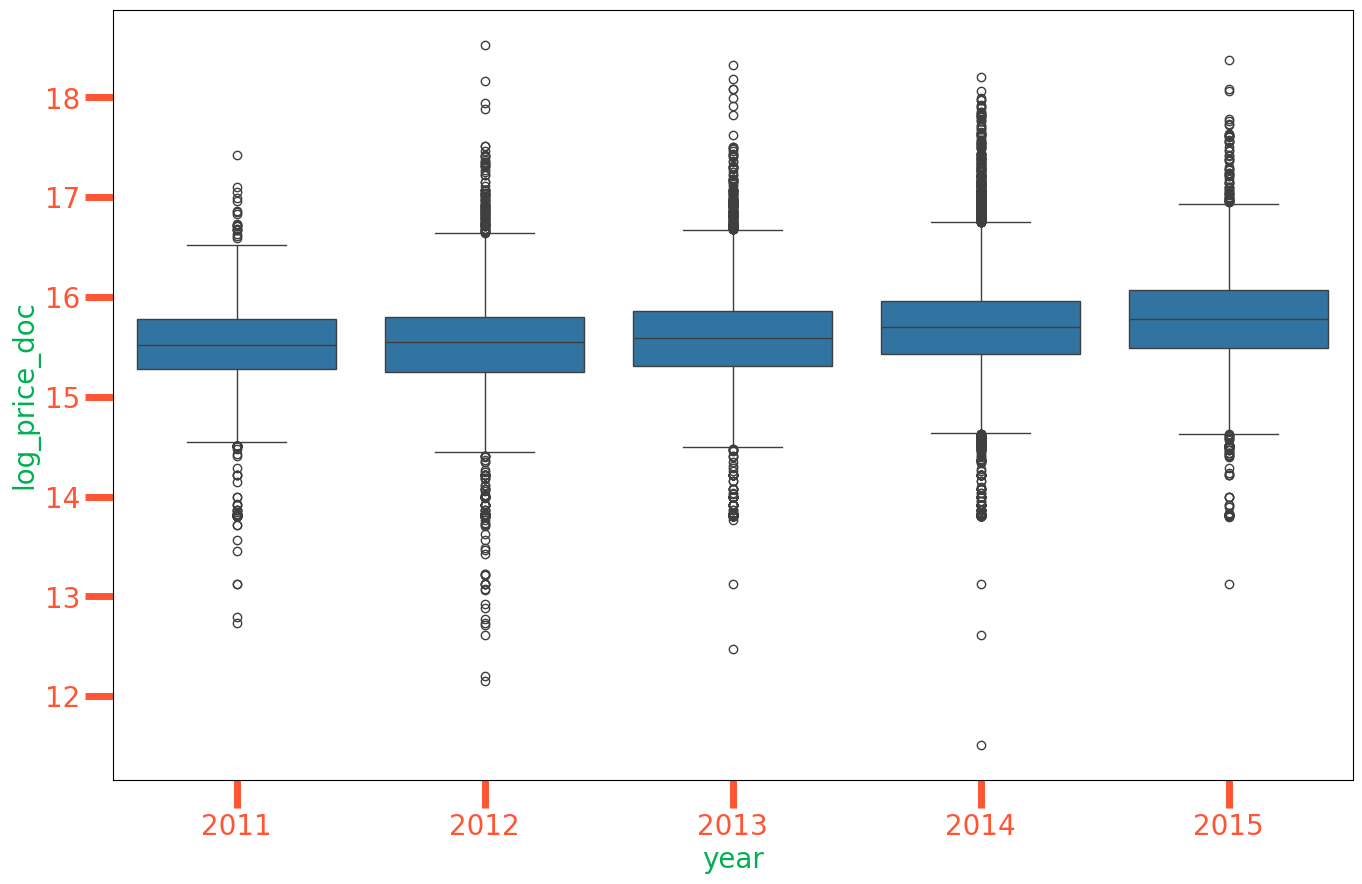

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=data['year'].astype('category'), data=data)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder к столбцу 'year'
data['year'] = label_encoder.fit_transform(data['year'])

# После этого столбец 'year' будет содержать числовые метки вместо категорий


In [23]:
data = data.replace({True: 1, False: 0})
data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,8,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072

<Axes: xlabel='month', ylabel='log_price_doc'>

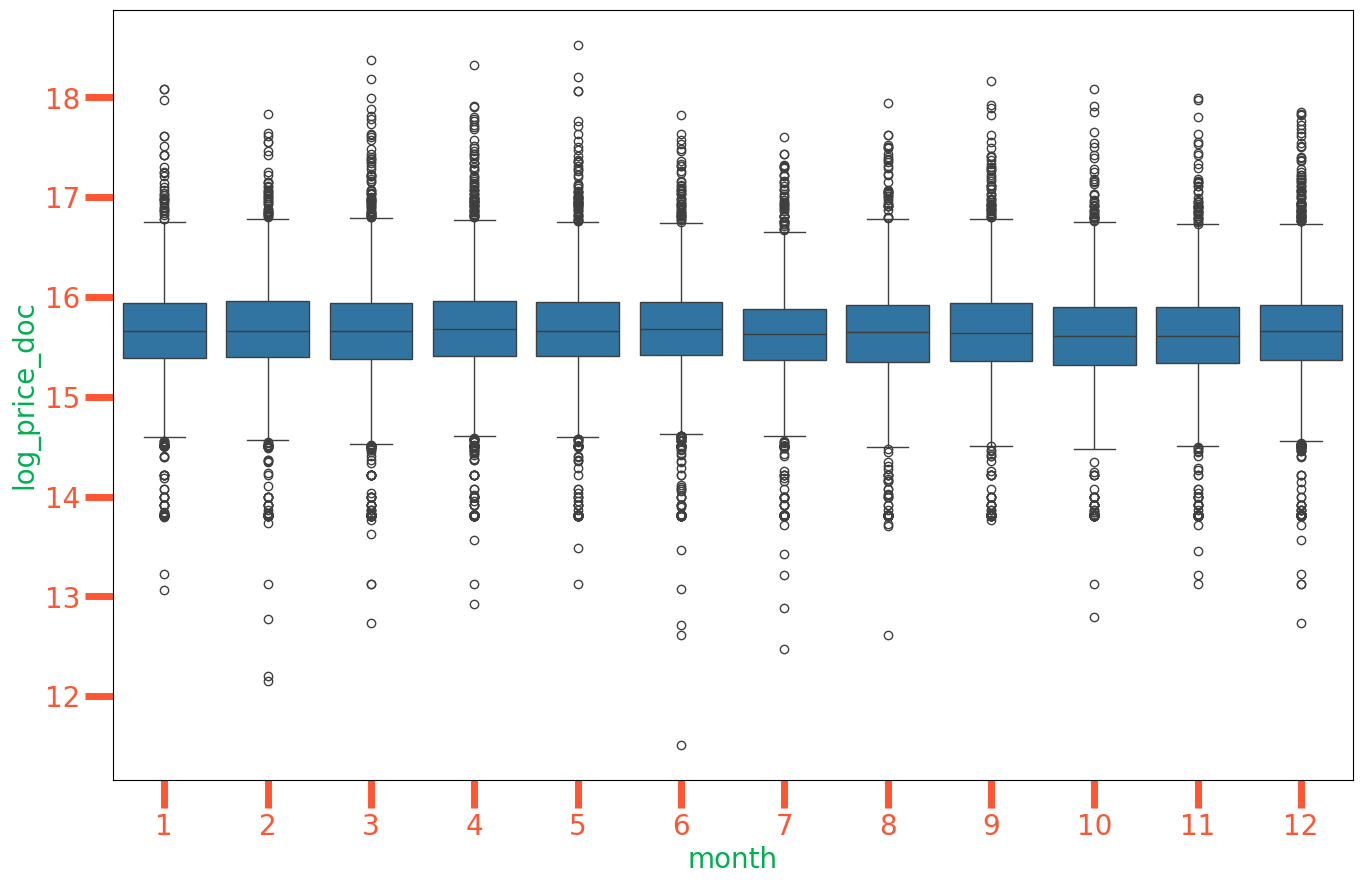

In [24]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=data['month'].astype('category'), data=data)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder к столбцу 'year'
data['year'] = label_encoder.fit_transform(data['month'])

# После этого столбец 'year' будет содержать числовые метки вместо категорий


In [26]:
data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,8,7
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072

<Axes: xlabel='floor', ylabel='log_price_doc'>

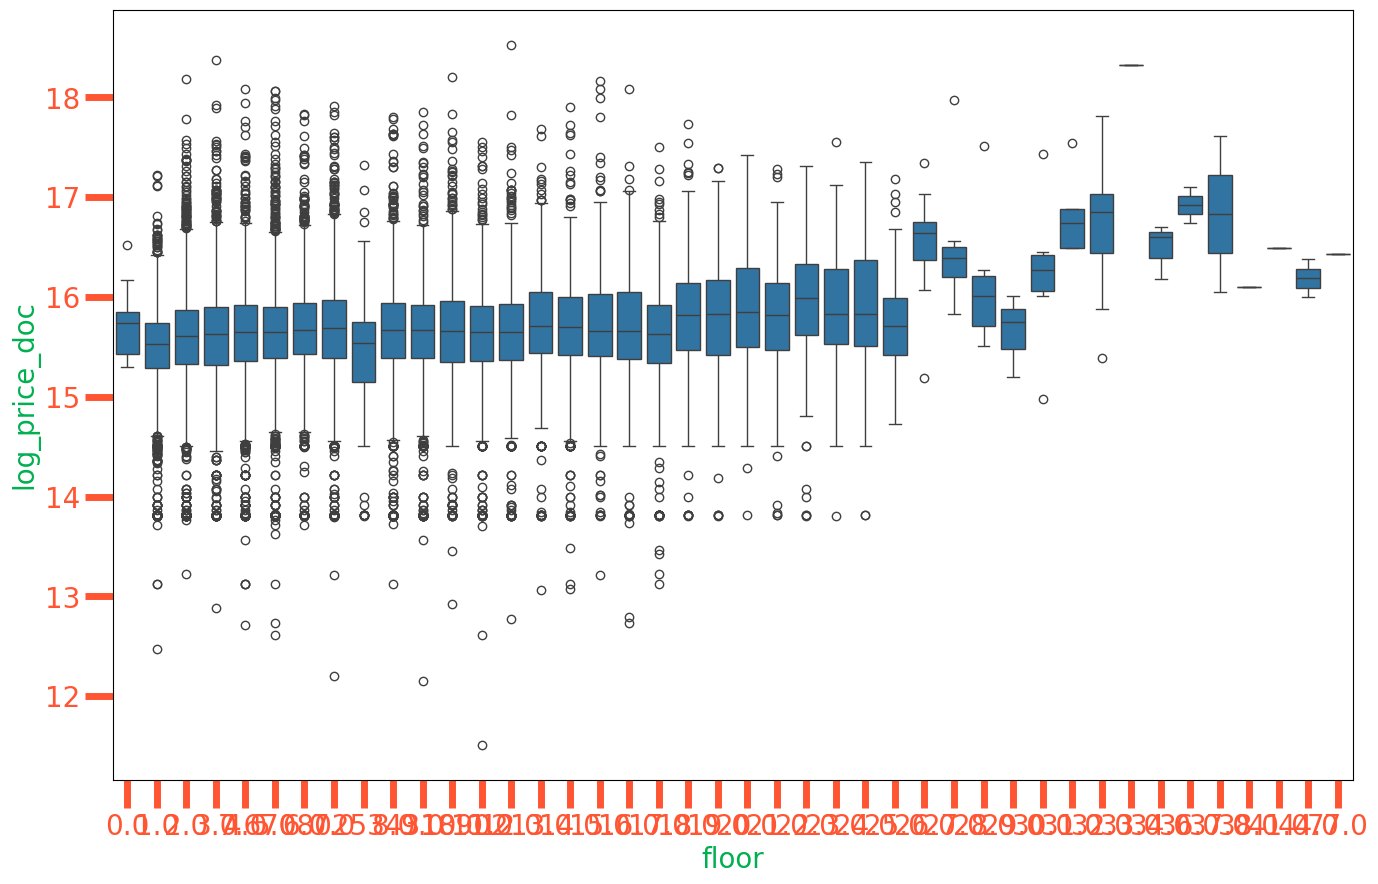

In [27]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=data['floor'].astype('category'), data=data)

<Axes: xlabel='market_count_3000', ylabel='log_price_doc'>

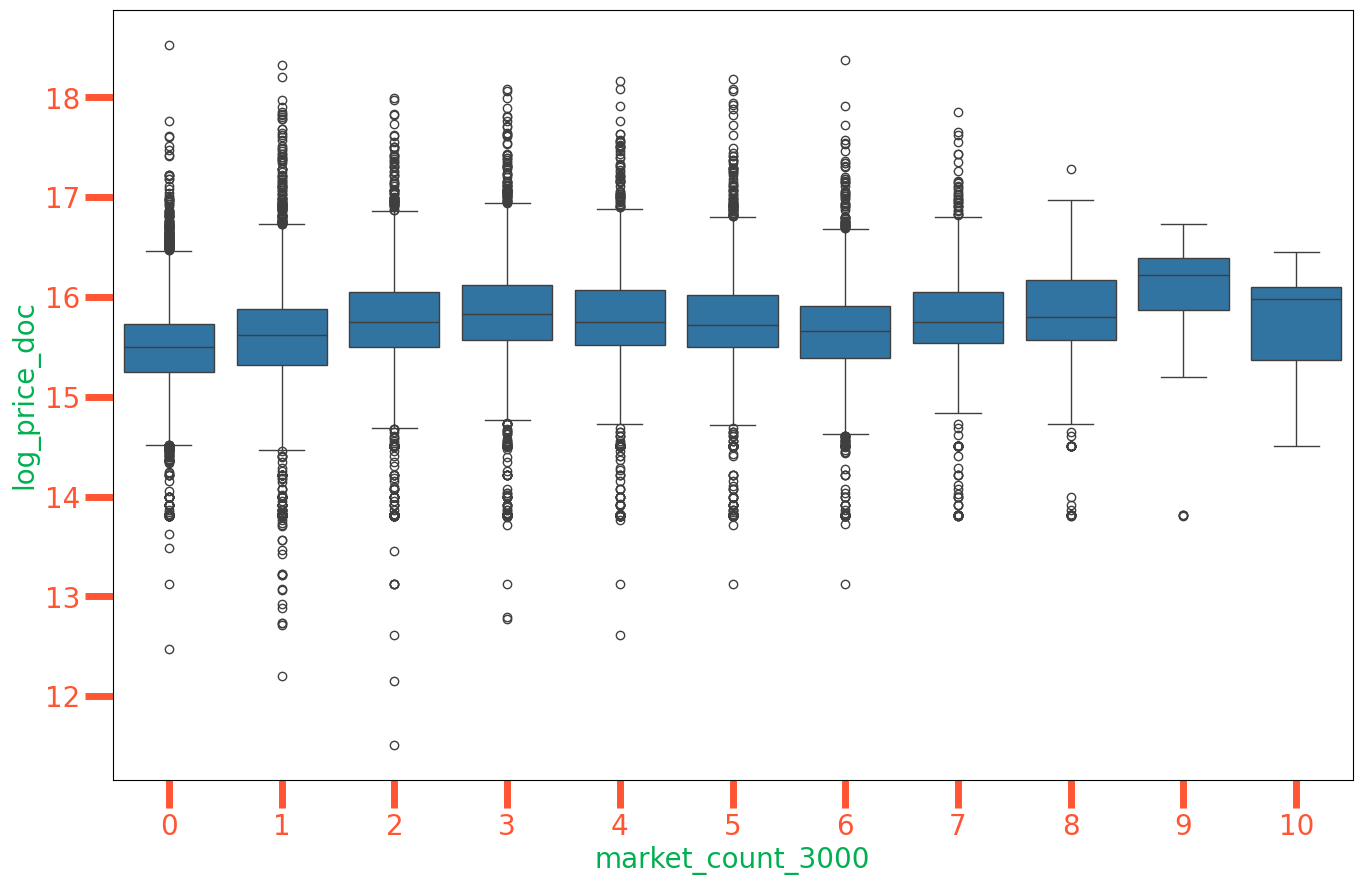

In [28]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=data['market_count_3000'].astype('category'), data=data)

<Axes: xlabel='product_type', ylabel='log_price_doc'>

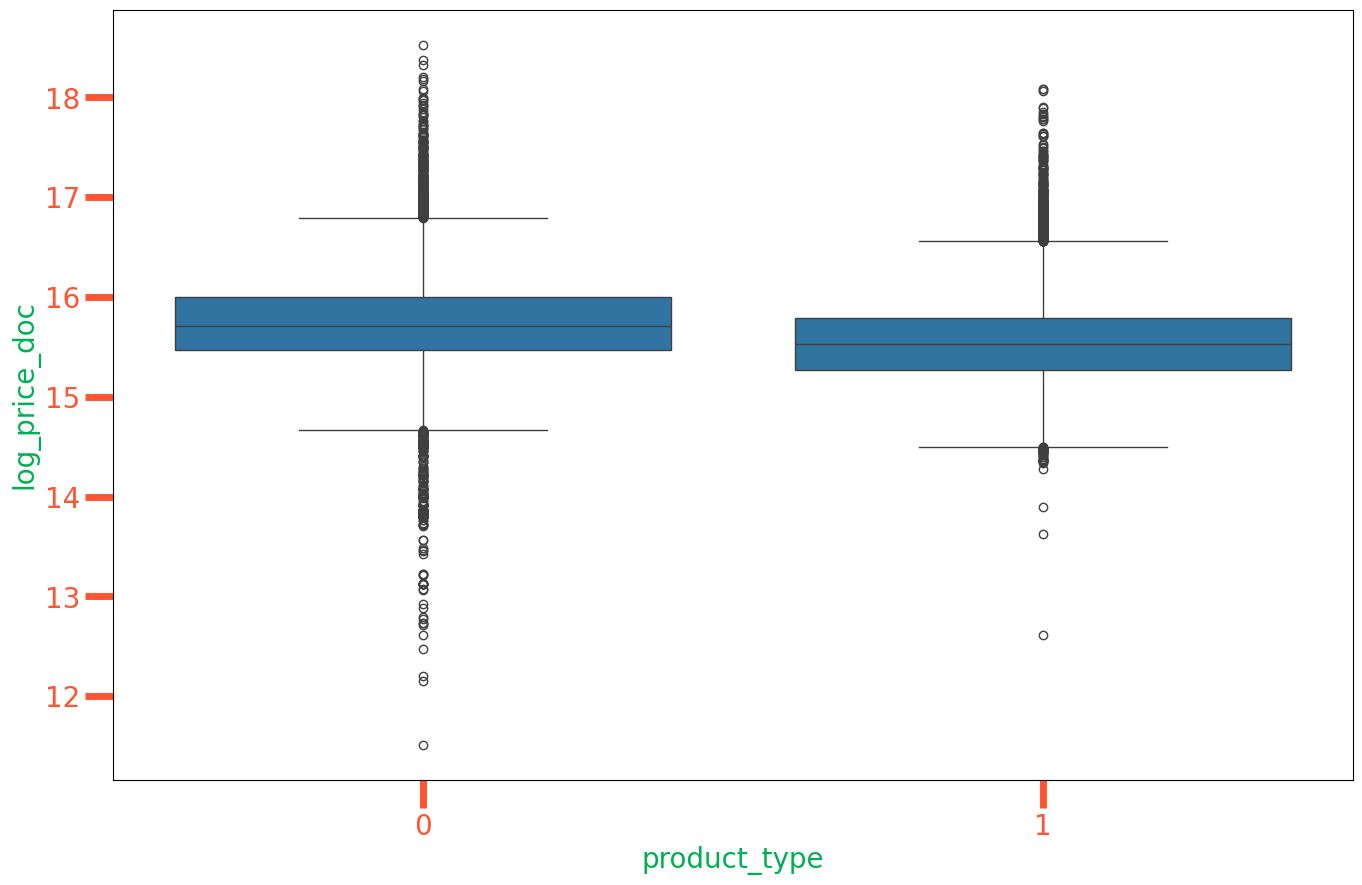

In [29]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=data['product_type'].astype('category'), data=data)

In [30]:
data = data.drop('timestamp', axis=1)

In [31]:
X = data.drop('log_price_doc', axis=1)
Y = data['log_price_doc']

In [32]:
X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,month,year
0,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,0,1.422391,10.918587,1.422391,0,3.830951,1.305159,0,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,1,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,8,7
1,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,0,9.503405,3.103996,2.887377,0,3.103996,0.694536,0,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.841544,6.829889,2.358840,0.230287,0,25.14

#### Построим пару базовых моделей в качестве бэйзлайна

Установим "Тренировочную базу" - некоторое множество $\{x_t: x_t\in X, t <= T_0 \}$. Далее на каждом шаге будем отсутпать от него на некоторый фиксированный (для простоты) интервал $T_1$, называя все объекты, которые в него попали, валидацией на текущем шаге. После обучения модели и замера качества, будем добавлять $T_1$ к тренировочной базе. Новую модель будем обучать на более широком трейне, а тест - на более далеких во времени данных.

P.S. тип валидации стоит выбирать, исходя из задачи. Если нам важно хорошо предсказывать что-то для объектов из будущего, то TimeSplit - хорошая идея.

In [33]:
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [34]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

test_losses = []
train_losses = []

for train_index, test_index in splitter.split(X):
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)

    preds_test = model.predict(x_test)
    preds_train = model.predict(x_train)

    error_test = np.mean((preds_test - y_test)**2)
    error_train = np.mean((preds_train - y_train)**2)

    test_losses.append(error_test)
    train_losses.append(error_train)

print(f"Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.288
Среднее MSLE на тестовых фолдах: 0.35


In [35]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X, Y,
                           scoring='neg_mean_squared_error',
                           cv = splitter, return_train_score=True)

cv_result

{'fit_time': array([0.51763916, 2.01577401, 0.64535046, 2.34995294]),
 'score_time': array([0.01101255, 0.01432371, 0.01531124, 0.01289368]),
 'test_score': array([-0.25737288, -0.66535984, -0.25313892, -0.22257489]),
 'train_score': array([-0.33150021, -0.27862206, -0.27605423, -0.26738361])}

In [36]:
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.288
Среднее MSLE на тестовых фолдах: 0.35


In [37]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, Y,
                                 scoring='neg_mean_squared_error',
                                 cv=splitter,
                                 return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.33
Среднее MSLE на тестовых фолдах: 0.36


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('Lasso', Lasso(max_iter=100000))
])
pipe.fit(X, Y)

print(pipe.predict(X.head(1)))

cv_result_pipe = cross_validate(pipe, X, Y,
                                scoring='neg_mean_squared_error',
                                cv=splitter,
                                return_train_score=True)

[15.60948317]


In [39]:
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.382
Среднее MSLE на тестовых фолдах: 0.355


In [40]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Lasso': Lasso(max_iter=100000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Lasso__alpha': 1.0,
 'Lasso__copy_X': True,
 'Lasso__fit_intercept': True,
 'Lasso__max_iter': 100000,
 'Lasso__positive': False,
 'Lasso__precompute': False,
 'Lasso__random_state': None,
 'Lasso__selection': 'cyclic',
 'Lasso__tol': 0.0001,
 'Lasso__warm_start': False}

In [41]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

search = GridSearchCV(pipe, param_grid,
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.33583):
{'Lasso__alpha': np.float64(0.11241379310344828)}


In [43]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso',
                 Lasso(alpha=np.float64(0.11241379310344828),
                       max_iter=100000))])

In [44]:
cv_result_pipe = cross_validate(pipe, X, Y,
                                scoring='neg_mean_squared_error',
                                cv=splitter,
                                return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.358
Среднее MSLE на тестовых фолдах: 0.336


#### Анализ выбросов

In [45]:
df = pd.concat((X, Y), axis=1)

top_quantile = df['log_price_doc'].quantile(0.975)
low_quantile = df['log_price_doc'].quantile(0.025)

print(f"Топ 2,5% значение таргета: {top_quantile.round(2)}")
print(f"Топ 97,5% значение таргета: {low_quantile.round(2)}")

Топ 2,5% значение таргета: 16.7
Топ 97,5% значение таргета: 13.82


In [46]:
df = df[(df['log_price_doc']>low_quantile)&(df['log_price_doc']<top_quantile)]

X_new, Y_new = df.drop('log_price_doc', axis=1), df['log_price_doc']

In [47]:
new_splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    "Lasso__alpha": alphas
}

search = GridSearchCV(pipe, param_grid, 
                      cv=new_splitter, scoring='neg_mean_squared_error')

search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.18857):
{'Lasso__alpha': np.float64(0.07827586206896552)}


In [48]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso',
                 Lasso(alpha=np.float64(0.07827586206896552),
                       max_iter=100000))])

In [49]:
cv_result_pipe = cross_validate(pipe, X_new, Y_new, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.185
Среднее MSLE на тестовых фолдах: 0.189


#### Сегментация данных

In [50]:
Owner_Occupier = df[df['product_type'] == 1].copy()
Investment = df[df['product_type'] == 0].copy()

In [51]:
X_Occupier = Owner_Occupier.drop('log_price_doc', axis=1)
X_Investment = Investment.drop('log_price_doc', axis=1)

Y_Occupier = Owner_Occupier['log_price_doc']
Y_Investment = Investment['log_price_doc']

In [52]:
search_Owner_Occupier = GridSearchCV(pipe, param_grid, 
                                     cv=splitter, scoring='neg_mean_squared_error')

search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f"Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):")
print(search_Owner_Occupier.best_params_)

pipe.set_params(Lasso__alpha=search_Owner_Occupier.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Occupier, Y_Occupier, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_result_pipe['train_score'])
error_Occupier_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}")

Best parameter (CV score=-0.11000):
{'Lasso__alpha': np.float64(0.04413793103448276)}
Среднее MSLE на тренировочных фолдах: 0.083
Среднее MSLE на тестовых фолдах: 0.11


In [53]:
search_Investment = GridSearchCV(pipe, param_grid, 
                                cv=splitter, scoring='neg_mean_squared_error')

search_Investment.fit(X_Investment, Y_Investment)

print(f"Best parameter (CV score={search_Investment.best_score_:.5f}):")
print(search_Investment.best_params_)

pipe.set_params(Lasso__alpha=search_Investment.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Investment, Y_Investment, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_result_pipe['train_score'])
error_Investment_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}")

Best parameter (CV score=-0.17907):
{'Lasso__alpha': np.float64(0.01)}
Среднее MSLE на тренировочных фолдах: 0.185
Среднее MSLE на тестовых фолдах: 0.179


In [54]:
# Перевзвесим скоры с учетом количества объектов в обоих типах жилья

n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0] 

# Посчитаем доли категорий в общий выборке 

share_Occupier = n_Occupier / data.shape[0]
share_Investment = n_Investment / data.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + \
                       share_Investment * error_Investment_train

weighted_error_test = share_Occupier * error_Occupier_test + \
                       share_Investment * error_Investment_test

print(f"Среднее взвешенное MSLE на тренировочных фолдах: {weighted_error_train.round(3)}")
print(f"Среднее взвешенное MSLE на тестовых фолдах: {weighted_error_test.round(3)}")

Среднее взвешенное MSLE на тренировочных фолдах: 0.138
Среднее взвешенное MSLE на тестовых фолдах: 0.144


#### Обучение модели XGboost

In [55]:
from xgboost import XGBRegressor

xg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBRegressor())
])


cv_xg_pipe = cross_validate(xg_pipe, X_Occupier, Y_Occupier,
                                scoring='neg_mean_squared_error',
                                cv=splitter,
                                return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_xg_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_xg_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.001
Среднее MSLE на тестовых фолдах: 0.03


In [56]:
cv_xg_pipe = cross_validate(xg_pipe, X_Investment, Y_Investment,
                                scoring='neg_mean_squared_error',
                                cv=splitter,
                                return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_xg_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_xg_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.031
Среднее MSLE на тестовых фолдах: 0.199


In [57]:
# Параметры для перебора
param_grid = {
    'xgboost__n_estimators': [100, 200, 300],
    'xgboost__learning_rate': [0.01, 0.05, 0.1],
    'xgboost__max_depth': [3, 5, 7],
}

In [ ]:
search_Owner_Occupier = GridSearchCV(xg_pipe, param_grid, 
                                     cv=splitter, scoring='neg_mean_squared_error')

search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f"Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):")
print(search_Owner_Occupier.best_params_)

# Устанавливаем лучшие параметры для шага xgboost в пайплайне
xg_pipe.set_params(**{
    f"xgboost__{key}": value for key, value in search_Owner_Occupier.best_params_.items()
})


cv_xg_pipe = cross_validate(xg_pipe, X_Occupier, Y_Occupier, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_xg_pipe['train_score'])
error_Occupier_test = -np.mean(cv_xg_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}")

In [ ]:
print("Предсказание: ", np.exp(search_Owner_Occupier.predict(X_Occupier.head(1))))
print("Истинный таргет: ", np.exp(Y_Occupier.head(1)))

Предсказание:  [9349333.]
Истинный таргет:  28    8254401.0
Name: log_price_doc, dtype: float64


In [ ]:
search_Investment = GridSearchCV(xg_pipe, param_grid, 
                                     cv=splitter, scoring='neg_mean_squared_error')

search_Investment.fit(X_Investment, Y_Investment)

print(f"Best parameter (CV score={search_Investment.best_score_:.5f}):")
print(search_Investment.best_params_)

# Устанавливаем лучшие параметры для шага xgboost в пайплайне
xg_pipe.set_params(**{
    f"xgboost__{key}": value for key, value in search_Investment.best_params_.items()
})


cv_xg_pipe = cross_validate(xg_pipe, X_Investment, Y_Investment, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_xg_pipe['train_score'])
error_Investment_test = -np.mean(cv_xg_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}")

Best parameter (CV score=-0.16290):
{'xgboost__learning_rate': 0.05, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 200}
Среднее MSLE на тренировочных фолдах: 0.031
Среднее MSLE на тестовых фолдах: 0.199


In [ ]:
# Перевзвесим скоры с учетом количества объектов в обоих типах жилья

n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0] 

# Посчитаем доли категорий в общий выборке 

share_Occupier = n_Occupier / data.shape[0]
share_Investment = n_Investment / data.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + \
                       share_Investment * error_Investment_train

weighted_error_test = share_Occupier * error_Occupier_test + \
                       share_Investment * error_Investment_test

print(f"Среднее взвешенное MSLE на тренировочных фолдах: {weighted_error_train.round(3)}")
print(f"Среднее взвешенное MSLE на тестовых фолдах: {weighted_error_test.round(3)}")

Среднее взвешенное MSLE на тренировочных фолдах: 0.019
Среднее взвешенное MSLE на тестовых фолдах: 0.128


In [ ]:
import json

best_params = search_Owner_Occupier.best_params_

with open('best_params_Occupier.json', 'w') as f:
    json.dump(best_params, f)

In [ ]:
best_params = search_Investment.best_params_

with open('best_params_Investment.json', 'w') as f:
    json.dump(best_params, f)